In [47]:
import sys
import tensorflow as tf
sys.path.append('../utils/')
import numpy as np

from synthetic import create_mnist_generator, Options

tf.executing_eagerly()

True

In [48]:
opts = Options(
    image_size=100, 
    digit_size=28, 
    num_channels=5, 
    seq_len=12, 
    step_size=0.5
    )
generator = create_mnist_generator(opts)

data_loader = tf.data.Dataset.from_generator(
    generator,
    output_types=(tf.float32, tf.float32)
)

images, ghi = next(iter(data_loader))

print(images.shape)

(5, 120000)


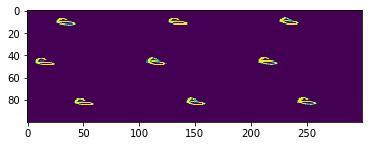

In [49]:
import matplotlib.pyplot as plt

plt.imshow(images.numpy()[1][:100*100*3].reshape(100,100*3))
plt.show()